# Programming for Data Analysis   
# Semester 2 Project 2018
### Student:    David O'Brien
### Student ID: G00364766

### Creating a dataset


## 1 - Choosing a Phenonmenon
As someone who likes to go for the occassional run and analyse the various statistics my Garmin Forerunner watch provides me with at the end of the run, I have decided to look at the performance of runners throughout a given year.  Any person that owns a garmin watch is able to log their run.  The data recorded on this run is then saved onto Garmins database, where it is used to generate insights for individual runners.  Below, I will outline the variables recorded and the informative dashboards provided to individual users.

### 1.1 - Variables recorded by the Garmin watch:

The Garmin Forerunner watch records multiple variables throughout your run.  Some of these are as follows:

- Average Pace
- Average Speed
- Total Distance
- Total Time
- Average Heart Rate
- Training Effect
- Elevation
- Calories

Another interesting feature of the watch is the Garmin Connect app. This is what provides the insights dashboard into your running performance by comparing different variables recorded to different groups of runners.  For example, you are able compare your running distance for a particular month against all other garmin users and see where you stand.  This can be broken down further into gender/age group/average pace.  

In the images below, I have extracted (using the garmin app) different plots showing the variables pace, distance and duration for both male and female users for the month of July 2018

Variable | Male | Female
---------|------|--------
Pace | <img src="https://github.com/davidobrien1/project/blob/master/images/2018_07_Pace_Male.png?raw=true" width="300" height="300"> | <img src="https://github.com/davidobrien1/project/blob/master/images/2018_07_Pace_Female.png?raw=true" width="300" height="300">
Distance |<img src="https://github.com/davidobrien1/project/blob/master/images/2018_07_Distance_Male.png?raw=true" width="300" height="300"> | <img src="https://github.com/davidobrien1/project/blob/master/images/2018_07_Distance_Female.png?raw=true" width="300" height="300"> 
Time |<img src="https://github.com/davidobrien1/project/blob/master/images/2018_07_Duration_Male.png?raw=true" width="300" height="300"> |  <img src="https://github.com/davidobrien1/project/blob/master/images/2018_07_Duration_Female.png?raw=true" width="300" height="300">

The plots next to the Pace variable shows that the average pace for the majority of male runners is 5.5min/km and the majority of female runners is 6min/km, indicating that males run faster than females

The plots next to the Distance variable shows that the average weekly distance for the majority of male runners is 2km and the majority of female runners is 1km, indicating that males run more than females

The plots next to the Duration variable shows that the average weekly duration for the majority of male runners is 10 minutes and the majority of female runners is 10 minutes, indicating that males and females, on average, run for the same length of time each week

### 1.2 - Identifying the variables

For the purpose of this project, the variables identified for this project, based on the information above will be:

- Gender
- Pace
- Distance
- Duration

The table below outlines the reasonable average values for each of the variables and how the variables might be realted to each other.

Variable | Male (min) | Male (max) | Male (average) | Female (min) | Female (max) | Female (average)
---------|------------|------------|----------------|--------------|--------------|----------------
Pace (min/km) | 14 | 3 | 5.5 | 14 | 3.5 |6
Distance (km) | 1 | 30 | 2 | 1 | 30 | 1
Duration (hours) | 0.17 | 5  | 0.17 | 0.17 | 5 | 0.17




It should be noted that the proportion of male to female runners is not given in Garmins data.  Therefore in order to get a realistic value of what this might be, I downloaded the 10k results from the Galway Bay Run for 2018.  Of the 1,374 participants that had recorded their gender, 861 (63%) were female and 511 (37%) were male.  I found this to be an interesting statistic, so decided to check the same information for the two longer race events for the Galway Bay Run.  Below are the findings from this.

Race | Male | Female
-----|------|--------
10k | 37% | 63%
21k (half marathon) | 56% | 44%
42k (full marathon) | 64% | 36%

It can be seen from above that as the race distance increases, the proportions shift from a female majority in the lower distance to a male majority in the higher distance.  To use reasonable proportions of male to female runners, i have based the percentages used in the synthesised data on the 10k values as the plots above show us that the average weekly distance is less than 10k.  


## 2 - Syntesise the Data Set


In [1]:
# Import modules
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import numpy as np


In [2]:
# set the seed so that the same set of numbers appear every time
np.random.seed(0)

In [3]:
# create dataframe for variables Gender, Distance, Duration, Pace
# create the 'running' dataframe for 1000 different runs showing the gender for each run
# create the variable 'gender' for the data frame using random.choice
gender = ['Male','Female'] # define the values
running = pd.DataFrame(np.random.choice(gender,1000,p=[0.37,0.63])) # the random.choice function lets us distribute the data to match the real world data from the Galway Bay marathon
running.columns = ['Gender'] # name the column

In [4]:
# check the percentage of male and female runners
(running['Gender'].value_counts()/running['Gender'].count())*100

Female    61.9
Male      38.1
Name: Gender, dtype: float64

In [5]:
running[0:5] # show the first five rows of data to confirm it works

,Gender
0,Female
1,Female
2,Female
3,Female
4,Female


In [6]:
# add a column for distance to the running dataframe.  adapted from https://jeffdelaney.me/blog/useful-snippets-in-pandas/
distance = []

for row in running.Gender:
    if row in ['Male']:
        distance.append(np.random.triangular(1,2,30)) # note that the min and max run distances we want to create for both male and female are 1 and 30 respectively, if they were different, this code would create the desired random numbers also
    else:
        distance.append(np.random.triangular(1,2,30)) # note that the min and max run distances we want to create for both male and female are 1 and 30 respectively, if they were different, this code would create the desired random numbers also

running['distance'] = distance

In [7]:
# show the first five rows data to confirm it works
running[0:5]

,Gender,distance
0,Female,11.818107
1,Female,1.540229
2,Female,9.369219
3,Female,14.622144
4,Female,2.137984


In [8]:
# add a column for pace.  sourced from https://jeffdelaney.me/blog/useful-snippets-in-pandas/
pace = []

for row in running.Gender:
    if row in ['Male']:
        pace.append(np.random.triangular(3,5.5,14)) 
    else:
        pace.append(np.random.triangular(3.5,6,14))

running['pace'] = pace

In [9]:
# show the first five rows data to confirm it works
running[0:5]

,Gender,distance,pace
0,Female,11.818107,10.020999
1,Female,1.540229,7.366076
2,Female,9.369219,7.671106
3,Female,14.622144,6.065501
4,Female,2.137984,8.240105


In [10]:
# add a column for time. Sourced from https://jeffdelaney.me/blog/useful-snippets-in-pandas/
running['time mins'] = running['distance'] * running['pace']

In [11]:
# show the first five rows data to confirm it works
running[0:5]

,Gender,distance,pace,time mins
0,Female,11.818107,10.020999,118.429243
1,Female,1.540229,7.366076,11.345443
2,Female,9.369219,7.671106,71.872273
3,Female,14.622144,6.065501,88.690635
4,Female,2.137984,8.240105,17.617211


In [12]:
# show summary statistics for the running data set
running[['distance','pace','time mins']].describe()

,distance,pace,time mins
count,1000.000000,1000.000000,1000.000000
mean,11.363329,7.754123,88.059434
std,7.049437,2.299008,61.709161
min,1.103213,3.045019,5.999830
25%,5.408010,5.981096,37.791653
50%,10.247125,7.369190,74.647150
75%,16.576727,9.373574,123.666326
max,28.906191,13.945023,367.525145


In [13]:
# show the summary statistics of the variables for the male and female
running.groupby("Gender").describe()

distance                                                      \
          count       mean       std       min       25%        50%   
Gender                                                                
Female    619.0  11.418196  7.070595  1.103213  5.541597  10.377484   
Male      381.0  11.274187  7.023292  1.367410  5.162878  10.077954   

                               pace               ...                          \
              75%        max  count      mean     ...          75%        max   
Gender                                            ...                           
Female  17.008073  28.790682  619.0  7.842649     ...      9.45638  13.945023   
Male    16.330167  28.906191  381.0  7.610298     ...      9.23467  13.309586   

       time mins                                                       \
           count       mean        std       min       25%        50%   
Gender                                                                  
Female     619.0  88.812972  60.934964  5.999830  38.65636  75.998752   
Male       381.0  86.835181  63.008203  6.797584  36.83306  72.790154   

                                
               75%         max  
Gender                          
Female  126.760887  323.366965  
Male    120.811244  367.525145  

[2 rows x 24 columns]

### 2.1 - Plots

The plots below demonstrate the simulated data closely match the data in the graphs at the top of the notebook.

Gender
Female    [[AxesSubplot(0.125,0.551739;0.336957x0.328261...
Male      [[AxesSubplot(0.125,0.551739;0.336957x0.328261...
dtype: object

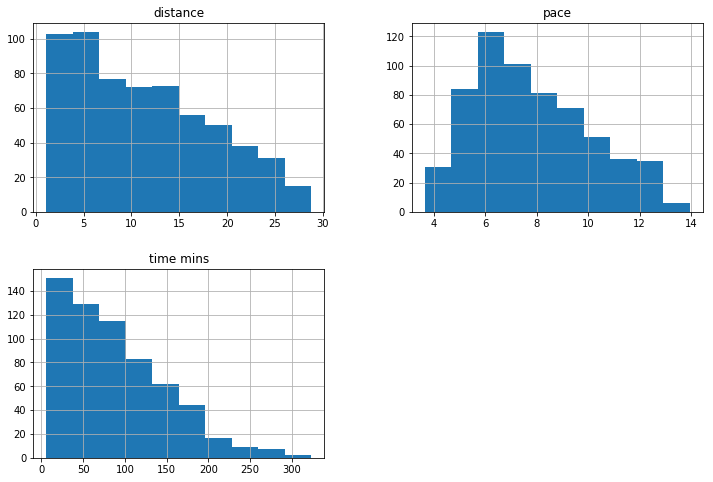

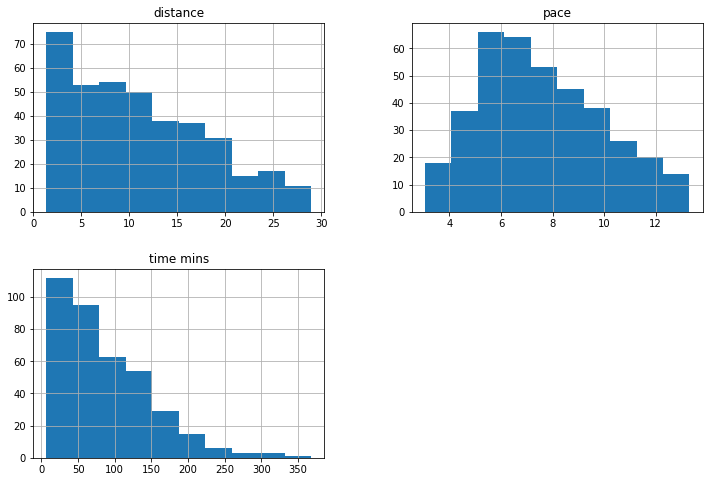

In [14]:
# plot the distribution of males and female in relation to pace 
running.groupby("Gender").hist(column=["distance","pace","time mins"], figsize=(12,8)) 

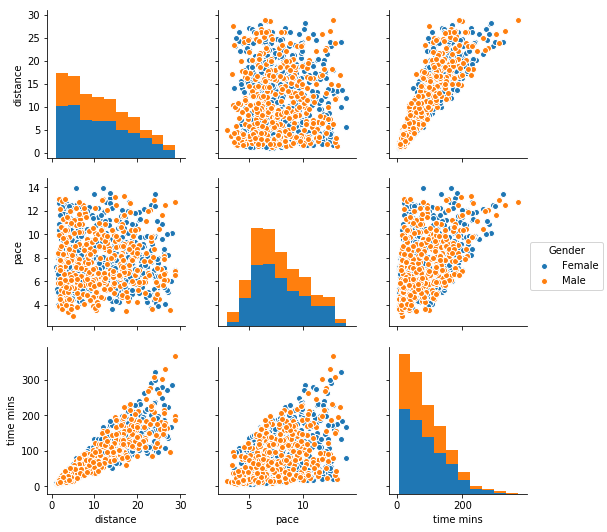

In [15]:
# Plot the running data set with a pair plot.
sns.pairplot(running, hue="Gender")

### 2.2 - The simulated data set

In [16]:
# show the simulated data set
running

,Gender,distance,pace,time mins
0,Female,11.818107,10.020999,118.429243
1,Female,1.540229,7.366076,11.345443
2,Female,9.369219,7.671106,71.872273
3,Female,14.622144,6.065501,88.690635
4,Female,2.137984,8.240105,17.617211
5,Female,20.109168,6.347811,127.649199
6,Female,10.259334,8.041129,82.496630
7,Female,1.942958,5.610462,10.900894
8,Female,4.904659,5.545987,27.201175
9,Female,23.866866,7.002179,167.120062


## References
1 - https://www.youtube.com/watch?v=3GpvWlVinf0

2 - https://realpython.com/python-random/

3 - https://arxiv.org/abs/0711.3199

4 - https://pandas.pydata.org/pandas-docs/stable/timeseries.html

5 - https://www.datacamp.com/community/tutorials/pandas-tutorial-dataframe-python

6 - https://www.shanelynn.ie/using-pandas-dataframe-creating-editing-viewing-data-in-python/

7 - https://stackoverflow.com/questions/30026815/add-multiple-columns-to-pandas-dataframe-from-function

8 - https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.assign.html

9 - https://gist.github.com/uupaa/f77d2bcf4dc7a294d109

10 - http://www.redtagtiming.com/results/RunGalwaybay2018_10km.pdf

11 - http://www.redtagtiming.com/results/RunGalwaybay2018_21km.pdf

12 - http://www.redtagtiming.com/results/RunGalwaybay2018_42km.pdf

13 - https://thelogicofscience.com/2016/10/10/basic-statistics-part-5-means-vs-medians-is-the-average-reliable/amp/

14 - http://jonathansoma.com/lede/algorithms-2017/classes/fuzziness-matplotlib/understand-df-plot-in-pandas/


### End